## Курс: Python для анализа данных 
### Курсовая работа 

В данной курсовой работе сравниваются модели машинного обучения для задачи классификации на наборе данных Fashion-MNIST.
Для тестирования выбраны модели: логистическая регрессия, полносвязная и сверточная нейронная сеть. В качестве алгоритма оптимизации используется стохастический градиентный спуск (stochastic gradient descent). При оценке качества используется метрика Accuracy.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization

%matplotlib inline

###### Загрузка данных fashion_mnist

In [2]:
test = pd.read_csv('fashion-mnist_test.csv', low_memory=False)
train = pd.read_csv('fashion-mnist_train.csv', low_memory=False)

###### Приведение данных к виду Y, X

In [3]:
y_train = train["label"]
x_train = train.drop("label", axis=1)
y_test = test["label"]
x_test = test.drop("label", axis=1)

###### Проверка выборочного изображения из тренировочного набора на диапазон пикселей

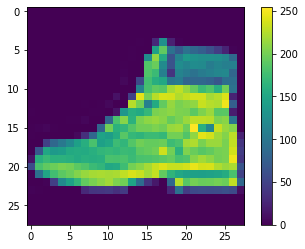

In [4]:
t_train = x_train.values.reshape(x_train.shape[0], 28, 28)
plt.figure()
plt.imshow(t_train[3000])
plt.colorbar()
plt.grid(False)

##### Подготовка данных для расчетов

In [5]:
num_classes = 10

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Создаем валидационную выборку

In [6]:
seed = 42
np.random.seed(seed)
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train, 
                                                  test_size = 0.2,
                                                  random_state = seed,
                                                  shuffle = True,
                                                  stratify = y_train

                                                 )
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values
n_xtrain = x_train.shape[0]
n_xval = x_val.shape[0]
n_xtest = x_test.shape[0]

Корректировка колличества эпох производится переменной epochs.

In [7]:
epochs = 20 # минимум 1
epochs_ = range(1,epochs + 1)

###### Модель для логистической регрессии и полносвязной нейронной сети

In [8]:
def neural_network(neural_network = None):
    sgd = tf.keras.optimizers.SGD()
    model = tf.keras.models.Sequential()
    
    if neural_network == 'fully':
        model.add(Dense(256, activation='relu', input_shape=(784,)))
        model.add(Dense(128, activation='relu'))
   
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=sgd, 
                  metrics=['accuracy'])
    return model 

###### Получение данных по эпохам 

In [9]:
def epochs_fit(max_epochs):
    accuracy_ = []
    for epochs in max_epochs:
        
        model.fit(x_train, y_train,
                validation_data=(x_val, y_val),
                epochs=epochs,
                verbose=0)
              
        print('Эпоха:', epochs)
        _ , accuracy = model.evaluate(x_val, y_val, verbose=2) 
        accuracy_ += [accuracy]    
    return accuracy_

###### Модель для сверточной нейронной сети

In [10]:
def conv_net(variant):
    
    sgd = tf.keras.optimizers.SGD()
    k = 64
    
    model = tf.keras.models.Sequential()
        
    model.add(Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2))) 
    
    if variant == 2: # Подключаются дополнительные сверточные слои
        k = 128      
        model.add(Convolution2D(128, (3,3), activation='relu'))
        model.add(MaxPooling2D((2,2)))
    
    if variant == 3: # Подключается дополнительный слой Batch Normalization    
        model.add(BatchNormalization(axis=-1, 
                                     momentum=0.99, 
                                     epsilon=0.001, 
                                     beta_initializer='zeros', 
                                     gamma_initializer='ones',
                                     moving_mean_initializer='zeros', 
                                     moving_variance_initializer='ones'))
           
    model.add(Flatten())
    model.add(Dense(k, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer=sgd, 
                  metrics=['accuracy'])
    return model

###### Графическая часть

In [11]:
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams["axes.facecolor"] = '#dedede'

In [12]:
def graf_m():
   
    plt.title ('График сравнения качества модели для {} эпох'.format(epochs), fontsize = 20, pad = 20)

    plt.xlabel('Эпохи', fontsize = 14, color='red')
    plt.ylabel("Значение по метрике 'Accuracy'", fontsize = 14, color='red')

    plt.xticks(range(1, epochs+1, 1))

    plt.grid(True)
    plt.legend(loc='lower right', fontsize=15)
    plt.tight_layout()

### 1. Логистическая регрессия
Логистическая регрессия реализована как нейронная сеть без скрытых слоев.

In [13]:
model = neural_network()
accuracy_lr = epochs_fit(epochs_)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Эпоха: 1
 - 0s - loss: 0.6658 - acc: 0.7851
Эпоха: 2
 - 0s - loss: 0.5531 - acc: 0.8149
Эпоха: 3
 - 0s - loss: 0.5049 - acc: 0.8298
Эпоха: 4
 - 0s - loss: 0.4785 - acc: 0.8360
Эпоха: 5
 - 0s - loss: 0.4627 - acc: 0.8379
Эпоха: 6
 - 0s - loss: 0.4516 - acc: 0.8425
Эпоха: 7
 - 0s - loss: 0.4477 - acc: 0.8434
Эпоха: 8
 - 0s - loss: 0.4392 - acc: 0.8450
Эпоха: 9
 - 0s - loss: 0.4358 - acc: 0.8458
Эпоха: 10
 - 0s - loss: 0.4326 - acc: 0.8490
Эпоха: 11
 - 0s - loss: 0.4282 - acc: 0.8508
Эпоха: 12
 - 0s - loss: 0.4305 - acc: 0.8499
Эпоха: 13
 - 0s - loss: 0.4259 - acc: 0.8518
Эпоха: 14
 - 0s - loss: 0.4243 - acc: 0.8526
Эпоха: 15
 - 0s - loss: 0.4249 - acc: 0.8519
Эпоха: 16
 - 0s - loss: 0.4226 - acc: 0.8524
Эпоха: 17
 - 0s - loss: 0.4257 - acc: 0.8522
Эпоха: 18
 - 0s - loss: 0.4231 - acc: 0.8513
Эпоха: 19
 - 0s - loss: 0.4223 - acc: 0.8532
Эпоха: 20
 - 0s - loss: 0.4235 - a

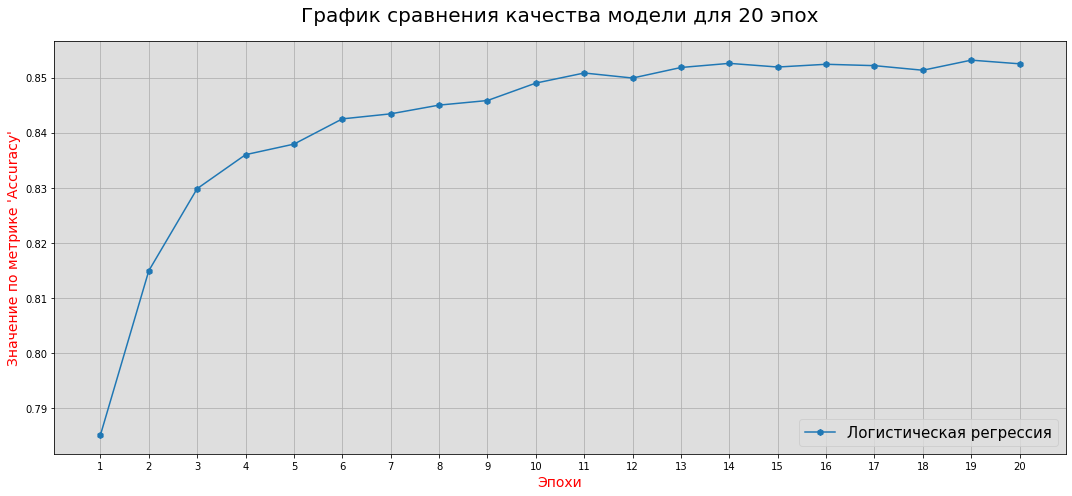

In [14]:
plt.plot(epochs_, accuracy_lr, '-h', label='Логистическая регрессия')

graf_m()

### 2. Полносвязная нейронная сеть
Полносвязная нейронная сеть реализована двумя скрытыми слоями.

In [15]:
model = neural_network('fully')
accuracy_fn = epochs_fit(epochs_)

Эпоха: 1
 - 0s - loss: 0.5338 - acc: 0.8188
Эпоха: 2
 - 0s - loss: 0.4395 - acc: 0.8422
Эпоха: 3
 - 0s - loss: 0.4116 - acc: 0.8477
Эпоха: 4
 - 0s - loss: 0.4162 - acc: 0.8504
Эпоха: 5
 - 0s - loss: 0.3585 - acc: 0.8698
Эпоха: 6
 - 1s - loss: 0.3419 - acc: 0.8729
Эпоха: 7
 - 0s - loss: 0.3189 - acc: 0.8854
Эпоха: 8
 - 0s - loss: 0.3253 - acc: 0.8817
Эпоха: 9
 - 0s - loss: 0.3154 - acc: 0.8892
Эпоха: 10
 - 0s - loss: 0.3180 - acc: 0.8910
Эпоха: 11
 - 0s - loss: 0.3771 - acc: 0.8763
Эпоха: 12
 - 0s - loss: 0.3557 - acc: 0.8894
Эпоха: 13
 - 0s - loss: 0.3782 - acc: 0.8916
Эпоха: 14
 - 0s - loss: 0.4085 - acc: 0.8884
Эпоха: 15
 - 0s - loss: 0.4740 - acc: 0.8808
Эпоха: 16
 - 0s - loss: 0.4507 - acc: 0.8907
Эпоха: 17
 - 0s - loss: 0.5140 - acc: 0.8902
Эпоха: 18
 - 0s - loss: 0.5294 - acc: 0.8892
Эпоха: 19
 - 0s - loss: 0.5772 - acc: 0.8888
Эпоха: 20
 - 0s - loss: 0.6038 - acc: 0.8910


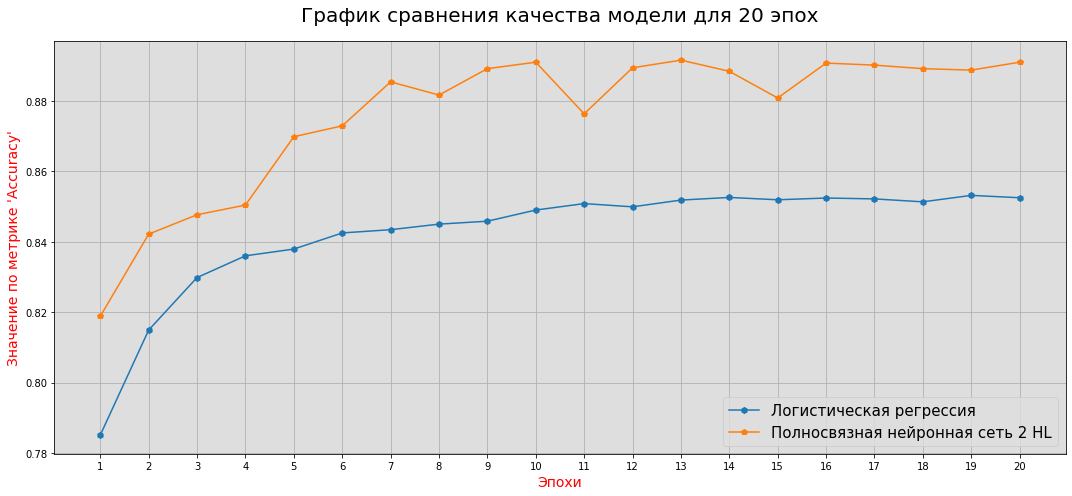

In [16]:
plt.plot(epochs_, accuracy_lr, '-h', label='Логистическая регрессия')
plt.plot(epochs_, accuracy_fn, '-p', label='Полносвязная нейронная сеть 2 HL')

graf_m()

HL - скрытый слой  

Показатели метрики логистической регрессии ниже чем у полносвязной нейронной сети. При использовании нескольких скрытых слоев в нейронной сети, происходит увеличение расчетных параметров, что приводит к лучшему обучению и увеличивает показатели метрики. Дальнейший ввод слоев повышает колличество расчетных параметров, что требует повышенной производительности оборудования и увеличивает риск переобучения сети, который может уменьшить показатель метрики.

### 3. Сверточная нейронная сеть

Сверточная нейронная сеть реализована в 3-х вариантах:

1 - сеть с двумя сверточными слоями,

2 - сеть с тремя сверточными слоями,

3 - сеть с двумя сверточными слоями и одним Batch Normalization слоем.

После сверточного слоя истользуется объединяющий слой Max Pooling. Перед полносвязным слоем исрользуется слой выравнивания Flatten.


In [17]:
# Преобразуем в [samples][width][height][pixels]
x_train = x_train.reshape(n_xtrain, 28, 28, 1)
x_test = x_test.reshape(n_xtest, 28, 28, 1)
x_val = x_val.reshape(n_xval, 28, 28, 1)

In [18]:
accuracy_ = {}
for i in range(1,4): # Значение вариантов сети: 1, 2, 3.    
    print('\nВариант -', i)
    model = conv_net(i)   
    accuracy_x = epochs_fit(epochs_)
    accuracy_ [i] = accuracy_x


Вариант - 1
Эпоха: 1
 - 2s - loss: 0.6159 - acc: 0.7671
Эпоха: 2
 - 2s - loss: 0.4786 - acc: 0.8210
Эпоха: 3
 - 2s - loss: 0.3977 - acc: 0.8544
Эпоха: 4
 - 2s - loss: 0.4048 - acc: 0.8506
Эпоха: 5
 - 2s - loss: 0.3204 - acc: 0.8813
Эпоха: 6
 - 2s - loss: 0.3035 - acc: 0.8877
Эпоха: 7
 - 2s - loss: 0.2968 - acc: 0.8910
Эпоха: 8
 - 2s - loss: 0.2781 - acc: 0.8997
Эпоха: 9
 - 2s - loss: 0.2738 - acc: 0.9054
Эпоха: 10
 - 2s - loss: 0.2832 - acc: 0.9065
Эпоха: 11
 - 2s - loss: 0.3275 - acc: 0.8933
Эпоха: 12
 - 2s - loss: 0.3412 - acc: 0.8981
Эпоха: 13
 - 2s - loss: 0.3996 - acc: 0.8927
Эпоха: 14
 - 2s - loss: 0.4293 - acc: 0.8992
Эпоха: 15
 - 2s - loss: 0.4709 - acc: 0.9022
Эпоха: 16
 - 2s - loss: 0.5399 - acc: 0.9030
Эпоха: 17
 - 2s - loss: 0.5675 - acc: 0.9039
Эпоха: 18
 - 2s - loss: 0.6190 - acc: 0.9032
Эпоха: 19
 - 2s - loss: 0.6550 - acc: 0.9031
Эпоха: 20
 - 2s - loss: 0.6844 - acc: 0.9027

Вариант - 2
Эпоха: 1
 - 2s - loss: 0.7620 - acc: 0.7178
Эпоха: 2
 - 2s - loss: 0.6093 - acc: 0.

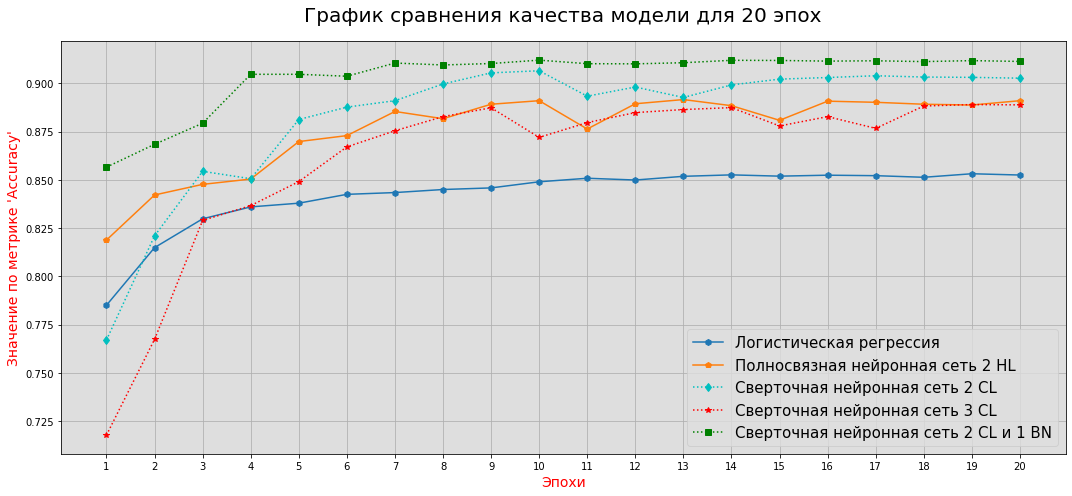

In [20]:
plt.plot(epochs_, accuracy_lr, '-h', label='Логистическая регрессия')
plt.plot(epochs_, accuracy_fn, '-p', label='Полносвязная нейронная сеть 2 HL')
plt.plot(epochs_, accuracy_[1], 'd:c', label='Сверточная нейронная сеть 2 CL')
plt.plot(epochs_, accuracy_[2], '*:r', label='Сверточная нейронная сеть 3 CL')
plt.plot(epochs_, accuracy_[3], 's:g', label='Сверточная нейронная сеть 2 CL и 1 BN')

graf_m()

HL - скрытый слой   
CL - сверточный слой   
BN - слой Batch Normalization

Показатель метрики сверточной нейронной сети (Вариант 1)  выше по сравнению с полносвязной нейронной сетью, но при увеличении глубины сети (Вариант 2) ухудшается. После ввода в модель слоя нормализации (Вариант 3) результаты Accuracy максимальны для данного датасета.

### Вывод. 
После сравнения качества моделей предлагаю использовать модель сверточной нейронной сети с двумя сверточными слоями и одним слоем Batch Normalization. Обучать сеть до 10-ой эпохи, в которой показатели  Accuracy - 0,9120.   